API 

The question we want to answer does the affect of prolonged social media use indicate with a more depressed individual. To accomplish this task we utilized the reddit API to observe if the average user karma score influences the subreddits related to mental health, like depression and adhd compared to other generic subreddits. The user karma score is a way of measuring the user activity on posts, analyzing factors like upvotes, comments, etc

In [3]:
import praw
import pandas as pd

# Authenticate with Reddit API using your own client ID, secret and user agent
reddit = praw.Reddit(client_id='BXdMZ7nRNEr0kahVVNH_DQ',
                     client_secret='efsc1ZRlVrmez8JHbQ5h9dN8UcJ68Q',
                     user_agent='Zain Khalid')

# Define a list of subreddits to get data from
subreddits = ['depression', 'adhd','ucdavis','OnePiece','bicycling','skyrim', 'leagueoflegends', 'counterstrike','animememes']

# Create an empty list to store author data
authors = []

# Loop through each subreddit and get the top 10 posts of the week
for subreddit in subreddits:
    subreddit_posts = reddit.subreddit(subreddit).top('week', limit=5)
    
    # Loop through each post and add author data to the list
    for post in subreddit_posts:
        author_data = {'Subreddit': subreddit, 'Author': post.author.name, 'Karma': post.author.link_karma}
        authors.append(author_data)

# Create a dataframe from the author list
df = pd.DataFrame(authors)

# Calculate average karma by subreddit and print it out
avg_karma_by_subreddit = df.groupby('Subreddit')['Karma'].mean()
print(avg_karma_by_subreddit)



/var/folders/m9/1yz_lqls7mb0b1hr3kbkr81w0000gn/T/ipykernel_3369/1966252081.py:17: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  subreddit_posts = reddit.subreddit(subreddit).top('week', limit=5)


Subreddit
OnePiece           21475.2
adhd                9928.4
animememes         22436.8
bicycling           1947.0
counterstrike       2155.8
depression         12349.8
leagueoflegends    17050.8
skyrim             39472.0
ucdavis             7093.2
Name: Karma, dtype: float64


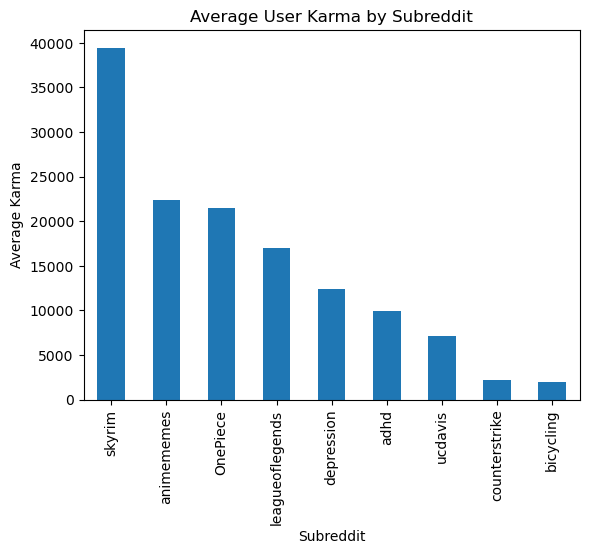

In [4]:
import matplotlib.pyplot as plt

# Calculate average karma by subreddit and plot it
avg_karma_by_subreddit = df.groupby('Subreddit')['Karma'].mean()
avg_karma_by_subreddit_sorted = avg_karma_by_subreddit.sort_values(ascending=False)  # sort in descending order
avg_karma_by_subreddit_sorted.plot.bar()
plt.title('Average User Karma by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Average Karma')

plt.show()



In this case, we see that the average user karma score doesn’t play a large role in affecting mental health negatively, due to less interaction within these subreddits. This however seems to directly contradict with our previous assumptions of the report. Since the average karma for the average /depression user is pretty low. The next assumption we made is it might be low because the average account age might also be super low as well. Since it would make sense for users to make a secondary post on these mental health subreddits, to ensure their anominity. 

In [18]:
import praw
import pandas as pd
from datetime import datetime

# Authenticate with Reddit API using your own client ID, secret and user agent
reddit = praw.Reddit(client_id='BXdMZ7nRNEr0kahVVNH_DQ',
                     client_secret='efsc1ZRlVrmez8JHbQ5h9dN8UcJ68Q',
                     user_agent='Zain Khalid')

# Define a list of subreddits to get data from
subreddits = ['depression', 'adhd','ucdavis','OnePiece','bicycling','skyrim', 'leagueoflegends', 'counterstrike','animememes']


# Create an empty list to store author data
authors = []

# Loop through each subreddit and get the top 10 posts of the week
for subreddit in subreddits:
    subreddit_posts = reddit.subreddit(subreddit).top('week', limit=17)
    
    # Loop through each post and add author data to the list
    for post in subreddit_posts:
        author_data = {'Subreddit': subreddit, 'Author': post.author.name, 'Created': post.author.created_utc}
        authors.append(author_data)

# Create a dataframe from the author list
df = pd.DataFrame(authors)

# Convert created_utc to datetime and calculate account age in days
df['Created'] = df['Created'].apply(datetime.utcfromtimestamp)
df['Account Age'] = (datetime.utcnow() - df['Created']).dt.days

# Calculate average account age by subreddit and print it out
avg_account_age_by_subreddit = df.groupby('Subreddit')['Account Age'].mean()
print(avg_account_age_by_subreddit)



/var/folders/m9/1yz_lqls7mb0b1hr3kbkr81w0000gn/T/ipykernel_3369/2621258054.py:19: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  subreddit_posts = reddit.subreddit(subreddit).top('week', limit=17)


Subreddit
OnePiece            876.588235
adhd               1327.294118
animememes          520.176471
bicycling          1256.235294
counterstrike      1035.235294
depression          628.000000
leagueoflegends    1916.588235
skyrim             1494.117647
ucdavis            1174.882353
Name: Account Age, dtype: float64


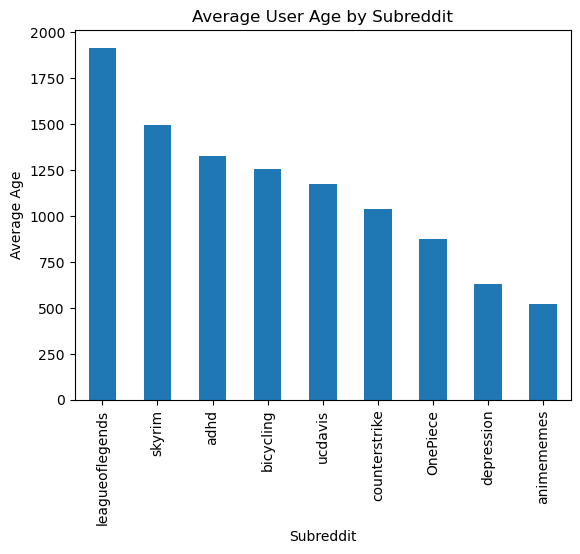

In [19]:
import matplotlib.pyplot as plt

# Calculate average karma by subreddit and plot it
avg_karma_by_subreddit = df.groupby('Subreddit')['Account Age'].mean()
avg_karma_by_subreddit_sorted = avg_karma_by_subreddit.sort_values(ascending=False)  # sort in descending order
avg_karma_by_subreddit_sorted.plot.bar()
plt.title('Average User Age by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Average Age')
plt.show()




Judging from this plot, even though the average account age for the average user from r/depression is significantly low, the average account age for average user from r/adhd is still relatively high.  In this case it is hard to tell for certain if more screen time may or may not correlate to a user being more active on mental health subreddits since there is a lot of variability such as the amount of users making a secondary account to post